In [49]:
# timing functions
import time
# library functions
import numpy as np
# deepcopy
import copy
# data processing
import pandas as pd
# plotting
import matplotlib.pyplot as plt

# format the pandas dataframe
pd.options.display.float_format = '{:.3e}'.format

# Gauss-Jordan Elimination

Method used in linear algebra to solve systems of linear equations and to find the inverse of a square matrix. It's an extension of Gaussian elimination, which is a process of transforming a matrix into row-echelon form through a series of row operations.

## Table of Contents

1. [Operations count](#1-operations-count)
2. [Implementation](#2-implementation)
   - [Standard Gauss-Jordan Elimination](#21-standard-gauss-jordan-elimination)
   - [Gauss-Jordan Elimination with Partial Pivoting](#22-gauss-jordan-elimination-with-partial-pivoting)
   - [Gauss-Jordan Elimination with Full Pivoting](#23-gauss-jordan-elimination-with-full-pivoting)
3. [Utilities](#3-utilities)
   - [Generate random matrix and vector](#31-generate-random-matrix-and-vector)
   - [Plotting](#32-plotting)
4. [Comparison](#4-comparison)
   - [Error comparison for different methods](#41-error-comparison-for-different-methods)
   - [Time comparison with library function](#42-time-comparison-with-library-function)

## 1. Operations count

For an n x n matrix, the Gauss-Jordan procedure requires:

$$ \frac{n^3}{2} + \frac{n^2}{2} \text{ multiplications/divisions} $$ 

$$ \frac{n^3}{2} - \frac{n^2}{2} \text{ additions/subtractions} $$



## 2. Implementation

### 2.1 Standard Gauss-Jordan Elimination

In [50]:
def Gauss_Jordan_std(A, b):
    n = len(A)
    for i in range(n):                       # Forward Elimination
        leading = A[i][i]
        if leading != 0:                     # First non-zero element in the row
            A[i] /= leading                  # Divide the row by the leading element
            b[i] /= leading                  # Divide the b vector by the leading element

        for j in range(i+1, n):              # Subtract the row from the next rows
            divider = A[j][i]                # The leading element of the row to be subtracted
            A[j] -= divider * A[i]           # Subtract the row
            b[j] -= divider * b[i]           # Subtract the b vector
    
    for i in range(n-1, -1, -1):             # Backward Elimination
        b[:i] -= A[:i, i] * b[i]             # Subtract the columns from the rows above
        A[:i, i] = 0                         # Set the column to 0                
    
    return b

### 2.2 Gauss-Jordan Elimination with Partial Pivoting

In [51]:
def Gauss_Jordan_partial_pivoting(A, b):
    n = len(A)
    for i in range(n):                       # Forward Elimination
        max_index = np.argmax(np.abs(A[i:, i]))# Find the maximum absvalue in the submatrix
        max_index += i
        if max_index != i:                   # Swap the rows
            A[[i, max_index]] = A[[max_index, i]]
            b[[i, max_index]] = b[[max_index, i]]

        leading = A[i][i]
        if leading != 0:                     # First non-zero element in the row
            A[i] /= leading                  # Divide the row by the leading element
            b[i] /= leading                  # Divide the b vector by the leading element

        for j in range(i+1, n):              # Subtract the row from the next rows
            divider = A[j][i]                # The leading element of the row to be subtracted
            A[j][i] = 0                      # set bottom part as zero      
            A[j][i+1:] -= divider * A[i][i+1:] # Subtract the row
            b[j] -= divider * b[i]           # Subtract the b vector
    
    for i in range(n-1, -1, -1):             # Backward Elimination
        b[:i] -= A[:i, i] * b[i]             # Subtract the columns from the rows above
        A[:i, i] = 0                         # Set the column to 0

    return b

### 2.3 Gauss-Jordan Elimination with Full Pivoting

Swapping column

In [52]:
def Gauss_Jordan_full_pivoting(A, b):
    n = len(A)
    swapped = np.arange(n)                   # Keep track of the swapped columns
    for i in range(n):                       # Forward Elimination
        submatrix = A[i:, i:]                # Full Pivoting      
        max_index = np.argmax(np.abs(submatrix))     # Find the maximum absvalue in the submatrix
        max_row_index, max_col_index = np.unravel_index(max_index, submatrix.shape)
        max_row_index += i
        max_col_index += i
        if max_row_index != i:               # Swap the rows
            A[[i, max_row_index]] = A[[max_row_index, i]]
            b[[i, max_row_index]] = b[[max_row_index, i]]
        if max_col_index != i:               # Swap the columns
            A[:, [i, max_col_index]] = A[:, [max_col_index, i]]
            swapped[[i, max_col_index]] = swapped[[max_col_index, i]]
    
        leading = A[i][i]
        if leading != 0:                     # First non-zero element in the row
            A[i] /= leading                  # Divide the row by the leading element
            b[i] /= leading                  # Divide the b vector by the leading element

        for j in range(i+1, n):              # Subtract the row from the next rows
            divider = A[j][i]                # The leading element of the row to be subtracted
            A[j, i] = 0                      # set bottom part as zero      
            A[j, i+1:] -= divider * A[i, i+1:] # Subtract the row
            b[j] -= divider * b[i]           # Subtract the b vector

    for i in range(n-1, -1, -1):             # Backward Elimination
        b[:i] -= A[:i, i] * b[i]             # Subtract the columns from the rows above
        A[:i, i] = 0                         # Set the column to 0
    
    result = np.zeros(n)
    for i in swapped:
        result[swapped[i]] = b[i]
    return result

## 3. Utilities

### 3.1 Generate random matrix and vector

In [53]:
def random_matrix(n):
    return np.random.uniform(-10e5, 10e5, size=(n, n))

def random_vector(n):
    return np.random.uniform(-10e5, 10e5, size=(n))

### 3.2 Plotting

In [54]:
def plot(data, ylabel, omit=list()):
    def setup_axis(axis, title):
        axis.plot(data[suptitle]["n"], data[suptitle][title])
        axis.set_title(title)
        axis.set_xlabel("n")
        axis.set_ylabel(ylabel)
        axis.grid()
        max_value = data.loc[:, [col for col in data.columns[1:] if col[1] not in omit]].max().max()
        axis.set_ylim(0, max_value)

    fig, axis = plt.subplots(1, 4, figsize=(20, 5))
    suptitle = data.columns[0][0]
    fig.suptitle(suptitle)
    columns = [col for _, col in data.columns[1:]]
    for i, col in enumerate(columns):
        setup_axis(axis[i], col)
    
    plt.show()

## 4. Comparison

Comparisions will be made for:
- Error comparison
- Time comparison

Method used for comparison:
| Method                                         | Signature                            |
|------------------------------------------------|--------------------------------------|
| Standard Gauss-Jordan Elimination              | ```Gauss_Jordan_std()```             |
| Gauss-Jordan Elimination with Partial Pivoting | ```Gauss_Jordan_partial_pivoting()```|
| Gauss-Jordan Elimination with Full Pivoting    | ```Gauss_Jordan_full_pivoting()```   |
| Numpy library function                         | ```numpy.linalg.solve()```           |

### 4.1 Error comparison for different methods

In [55]:
def check_solution(A, b, func):
    n = len(A)
    x = func(copy.deepcopy(A), copy.deepcopy(b))
    error = 0
    for i in range(n):
        sum = np.dot(A[i], x)
        error += abs(sum - b[i])     # L2 norm
    return error

def compare_error():
    data = {"n": [], "Standard": [], "Partial Pivoting": [], "Full Pivoting": [], "numpy.linalg.solve": []}
    for n in [i*100 for i in range(1, 11)]:
        A = random_matrix(n)
        b = random_vector(n)
        data["n"].append(n)
        data["Standard"].append(check_solution(A, b, Gauss_Jordan_std))
        data["Partial Pivoting"].append(check_solution(A, b, Gauss_Jordan_partial_pivoting))
        data["Full Pivoting"].append(check_solution(A, b, Gauss_Jordan_full_pivoting))
        data["numpy.linalg.solve"].append(check_solution(A, b, np.linalg.solve)) 
    df = pd.DataFrame(data)
    df.columns = pd.MultiIndex.from_product([['Error of different methods'], df.columns])
    return df

In [56]:
result = compare_error()
display(result)

Error of different methods                                           \
                           n  Standard Partial Pivoting Full Pivoting   
0                        100 2.358e-05        9.290e-07     7.629e-07   
1                        200 5.997e-04        4.825e-06     4.683e-06   
2                        300 7.659e-04        4.487e-06     2.891e-06   
3                        400 2.498e-03        2.829e-05     1.671e-05   
4                        500 8.350e-02        3.288e-04     1.834e-04   
5                        600 1.057e-01        7.612e-05     4.631e-05   
6                        700 4.630e-01        6.098e-04     3.801e-04   
7                        800 2.897e-02        1.158e-04     6.790e-05   
8                        900 1.475e-02        1.232e-04     7.682e-05   
9                       1000 5.383e-02        2.844e-04     1.315e-04   

                      
  numpy.linalg.solve  
0          1.012e-06  
1          5.303e-06  
2          3.942e-06  
3          2.879e-05  
4          2.483e-04  
5          7.891e-05  
6          6.691e-04  
7          1.402e-04  
8          1.286e-04  
9          3.002e-04

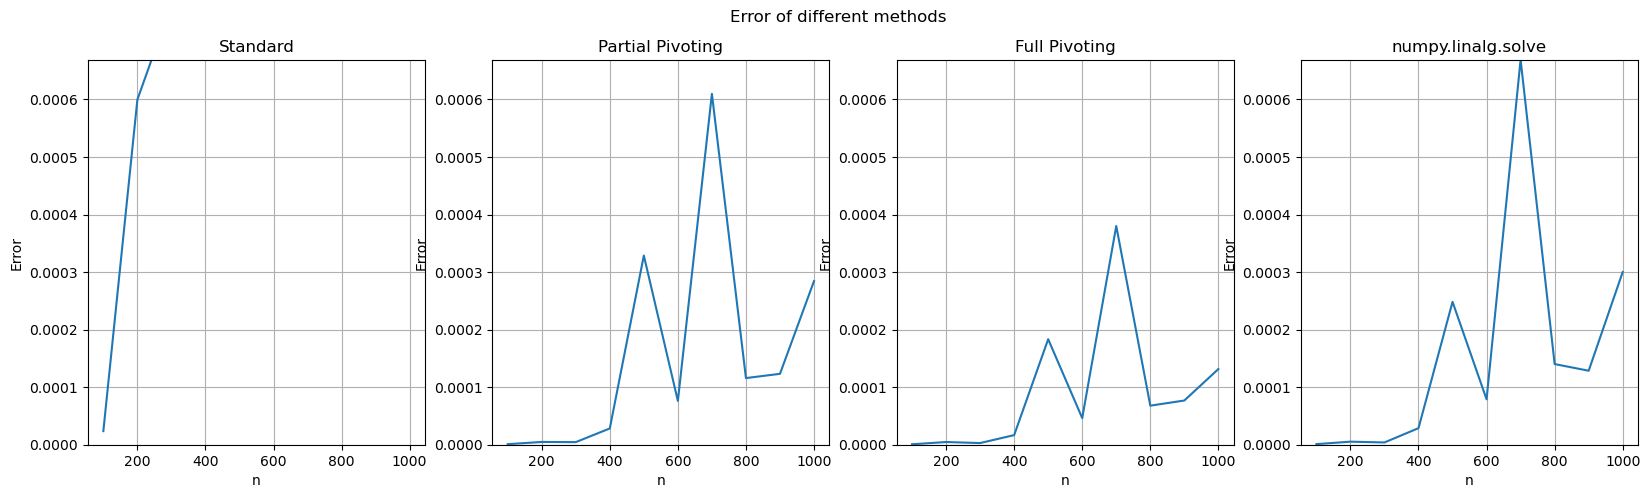

In [61]:
plot(result, "Error", omit=["Standard"])

Vector multiplication can be burdened with numerical mistakes, but trend of error can be observed.

### 4.2 Comparison with library function

For more reliable results and to avoid any bias, the time comparison will be made for different sizes of matrices and the average time of 3 runs will be taken.

In [58]:
def count_time(func, A, b):
    A_copy = copy.deepcopy(A)
    b_copy = copy.deepcopy(b)
    start = time.time()
    func(A_copy, b_copy)
    return time.time() - start

def compare_time():
    data = {"n": [], "Standard": [], "Partial Pivoting": [], "Full Pivoting": [], "numpy.linalg.solve": []}
    for n in [100*i for i in range(1,11)]:
        time_std  = 0
        time_ppiv = 0
        time_nmpy = 0
        time_fpiv = 0
        for _ in range(3):
            A = random_matrix(n)
            b = random_vector(n)

            time_std  += count_time(Gauss_Jordan_std, A, b)
            time_ppiv += count_time(Gauss_Jordan_partial_pivoting, A, b)
            time_nmpy += count_time(np.linalg.solve, A, b)
            time_fpiv += count_time(Gauss_Jordan_full_pivoting, A, b)

        data["n"].append(n)
        data["Standard"].append(time_std / 3)
        data["Partial Pivoting"].append(time_ppiv / 3)
        data["Full Pivoting"].append(time_fpiv / 3)
        data["numpy.linalg.solve"].append(time_nmpy / 3)

    df = pd.DataFrame(data)
    df.columns = pd.MultiIndex.from_product([['Time of different methods'], df.columns])
    return df

In [59]:
results = compare_time()
display(results)

Time of different methods                                           \
                          n  Standard Partial Pivoting Full Pivoting   
0                       100 9.272e-03        1.215e-02     1.228e-02   
1                       200 3.760e-02        4.669e-02     4.665e-02   
2                       300 8.471e-02        1.118e-01     1.320e-01   
3                       400 1.453e-01        1.735e-01     1.890e-01   
4                       500 2.299e-01        2.751e-01     2.993e-01   
5                       600 3.595e-01        4.091e-01     4.469e-01   
6                       700 5.006e-01        5.709e-01     6.348e-01   
7                       800 6.711e-01        7.639e-01     8.644e-01   
8                       900 8.758e-01        9.844e-01     1.133e+00   
9                      1000 1.105e+00        1.228e+00     1.478e+00   

                      
  numpy.linalg.solve  
0          1.346e-04  
1          7.881e-03  
2          1.127e-02  
3          8.098e-04  
4          1.177e-03  
5          1.777e-03  
6          2.382e-03  
7          3.195e-03  
8          3.925e-03  
9          5.788e-03

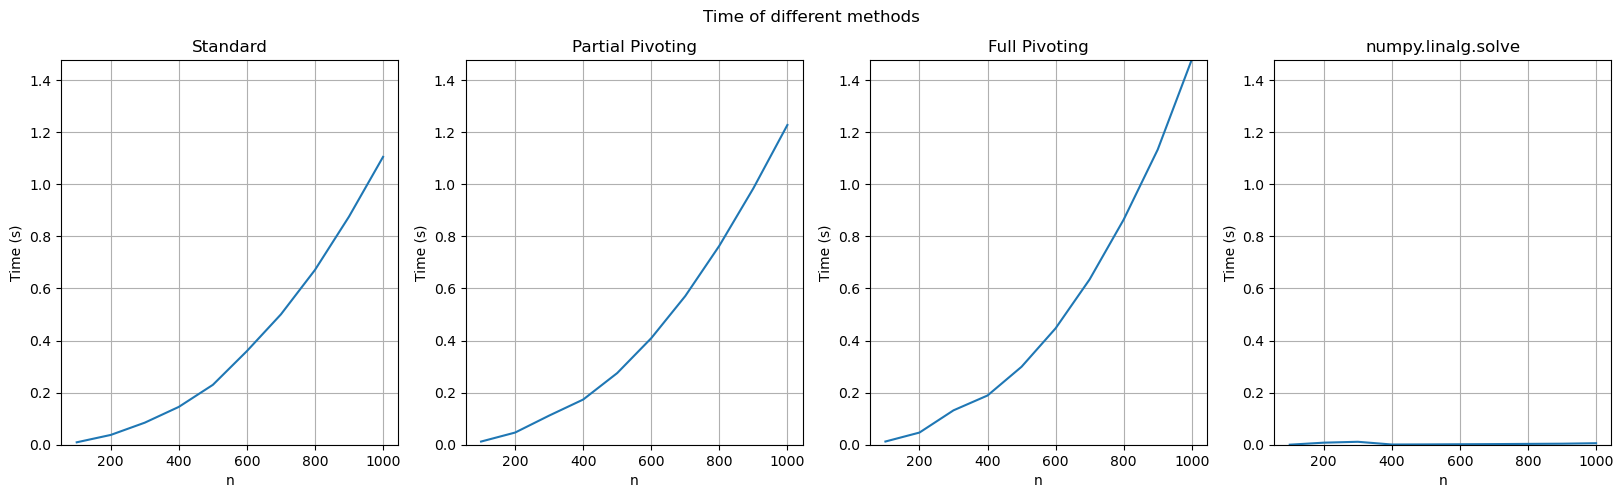

In [60]:
plot(results, "Time (s)")

All methods have similar measured time, except for libray function which is faster than all other methods, because of the optimized code and use of C/C++ libraries.

-------------------------------------------------------------------------------------------------------------------------------------------------------------